# Learn and Build Internship -> Task-3

__`Name : SHARON SAM S`__

__Agenda:__

* __`Regression -> Chennai House Price:`__
    
    * Import necessary libraries and dataset

    * Explore the data by printing the properties of the dataset
    
    * Handling Missing values
    
    * Handling categorical features

    * Extraction of input and output features from dataset

    * Split the dataset into train and test data with 20% as test data

    * Normalizations - Standard Scaler and MinMax Scaler

    * Models -  Linear, Ridge, Lasso and KNeighbors Regressor models

    * Model Evaluation metrics - r2 score and root mean squared error

    * Best Model Selection and Evaluation

    * Visualization of Best Regression Model
    
    * Predicted values
    
* __`Classification -> Animal Class Type:`__
    
    * Import necessary libraries and dataset

    * Explore the data by printing the properties of the dataset
    
    * Extraction of input and output features from dataset

    * Split the dataset into train and test data with 33% as test data

    * Normalizations - Standard Scaler and MinMax Scaler

    * Models -  Logistic Regression Classifier, Decision Tree Classifier and Random Forest Classifier models

    * Model Evaluation metrics - accuracy

    * Best Model Selection and Evaluation

    * Visualization of Best Claasifier Model
    
* End Notes

# Regression -> Chennai House Price

## (Comparison of Linear, Ridge, Lasso and KNeighbors Regressor models)

__`Dataset link:`__  https://www.kaggle.com/datasets/amaanafif/chennai-house-price

### Import necessary libraries and modules

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from time import process_time

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import *

### Import dataset

In [2]:
df = pd.read_csv("clean_data.csv")

### Properties of the dataset

In [3]:
df.head()

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,NaN,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2.0,NaN,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,NaN,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd


In [4]:
print("There are", df.shape[0], "samples and", df.shape[1], "features with totally", df.size, "elements in the dataset")

There are 2620 samples and 8 features with totally 20960 elements in the dataset


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   bathroom  1403 non-null   float64
 5   age       1729 non-null   float64
 6   location  2620 non-null   object 
 7   builder   2620 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 163.9+ KB


### Handling Missing values

In [6]:
df.isnull().sum()

price          0
area           0
status         0
bhk            0
bathroom    1217
age          891
location       0
builder        0
dtype: int64

In [7]:
df['bathroom'].replace(np.nan, 0, inplace=True)

df['age'].replace(np.nan, 0, inplace=True)

In [8]:
df.isnull().sum().sum()

0

### Handling Catergorical features

In [9]:
df.status.value_counts()

Ready to move         1487
Under Construction    1133
Name: status, dtype: int64

In [10]:
df['status'].replace({'Ready to move':1, 'Under Construction':0}, inplace=True)

In [11]:
df.location.unique()

array(['Sembakkam', 'Selaiyur', 'Mogappair', 'Ambattur', 'Pallavaram',
       'Virugambakkam', 'Thirumazhisai', 'Moolakadai', 'Ottiyambakkam',
       'Perungalathur', 'Gerugambakkam', 'Anna Nagar', 'Gopalapuram',
       'Pammal', 'Porur', 'Navallur', 'Sholinganallur', 'Vanagaram',
       'T Nagar', 'Guindy', 'Madipakkam', 'Perumbakkam', 'Velachery',
       'Medavakkam', 'Gowrivakkam', 'Chromepet', 'Thalambur', 'Thandalam',
       'Ayanambakkam', 'Kanathur Reddikuppam', 'Adyar', 'Kolapakkam',
       'Thaiyur', 'Thoraipakkam OMR', 'Poonamallee', 'Padur',
       'East Tambaram', 'Tiruvottiyur', 'Iyappanthangal', 'Padappai',
       'Mugalivakkam', 'Kelambakkam', 'Thirumullaivoyal', 'Madhavaram',
       'Kundrathur', 'Vengaivasal', 'Siruseri', 'Manapakkam',
       'Karapakkam', 'Sithalapakkam', 'Madambakkam', 'Perungudi',
       'Vadapalani', 'Alwarpet', 'Thiruvidandhai', 'Kotturpuram',
       'Velappanchavadi', 'Kilpauk', 'Besant Nagar', 'Vellakkal', 'Avadi',
       'Kolathur', 'Thiruvanmi

In [12]:
df_location_frequency = df['location'].value_counts().to_dict()

df['location'] = df['location'].map(df_location_frequency)

In [13]:
df.builder.unique()

array(['MP Developers', 'DAC Promoters',
       'Casagrand Builder Private Limited', 'Dugar Housing Builders',
       'Radiance Realty Developers India Ltd', 'Traventure Homes Pvt Ltd',
       'Urbanrise', 'Navin Housing Properties P LTD',
       'Jones foundation private limited', 'Isha Homes',
       'Kochar Homes Pvt Ltd', 'Pushkar Properties Pvt Ltd',
       'Asset Tree Homes', 'Urban Tree Infrastructures', 'Olympia Group',
       'Vijay Raja Homes Private Limited', 'Kamalam Builder Pvt Ltd',
       'Appaswamy Real Estate', 'VNR Homes', 'PS Srijan Developers',
       'Lifestyle Housing', 'Puravankara Limited', 'Jones Foundations',
       'Plaza Group', 'Urbando Housing LLP', 'EK Realtors',
       'The Nest Builder', 'Doshi Housing', 'Grandstyle constructions',
       'vinoth builders', 'GTK Foundations', 'Baashyaam Group', 'chris',
       'Krishna Constructions', 'AKS Housing Dedvelopment Pvt Ltd',
       'Mayances Construction and Engineering Services',
       'Ramaniyam Real Esta

In [14]:
df_builder_frequency = df['builder'].value_counts().to_dict()

df['builder'] = df['builder'].map(df_builder_frequency)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   int64  
 3   bhk       2620 non-null   int64  
 4   bathroom  2620 non-null   float64
 5   age       2620 non-null   float64
 6   location  2620 non-null   int64  
 7   builder   2620 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 163.9 KB


### Extraction of input and output features from dataset

In [16]:
X = df.drop(['price'], axis=1)

y = df['price']

### Split the dataset into train and test data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print("Shape of training set:")
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("\n")
print("Shape of testing set:")
print("X_test", X_test.shape)
print("y_test", y_test.shape)

Shape of training set:
X_train (2096, 7)
y_train (2096,)


Shape of testing set:
X_test (524, 7)
y_test (524,)


### Model Building and Evaluation

In [18]:
ss_lr = [('ss', StandardScaler()), ('lr', LinearRegression())]
mm_lr = [('mm', MinMaxScaler()), ('lr', LinearRegression())]

ss_rr = [('ss', StandardScaler()), ('rr', Ridge())]
mm_rr = [('mm', MinMaxScaler()), ('rr', Ridge())]

ss_ls = [('ss', StandardScaler()), ('ls', Lasso())]
mm_ls = [('mm', MinMaxScaler()), ('ls', Lasso())]

ss_kn = [('ss', StandardScaler()), ('kn', KNeighborsRegressor())]
mm_kn = [('mm', MinMaxScaler()), ('kn', KNeighborsRegressor())]

models = { 
    "Linear Regression": LinearRegression(),
    "Linear Regression with StandardScaler": Pipeline(ss_lr),
    "Linear Regression with MinMaxScaler": Pipeline(mm_lr), 
    "Ridge Regression": Ridge(),
    "Ridge Regression with StandardScaler": Pipeline(ss_rr),
    "Ridge Regression with MinMaxScaler": Pipeline(mm_rr),  
    "Lasso Regression": Lasso(),
    "Lasso Regression with StandardScaler": Pipeline(ss_ls),
    "Lasso Regression with MinMaxScaler": Pipeline(mm_ls),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "KNeighbors Regressor with StandardScaler": Pipeline(ss_kn),
    "KNeighbors Regressor with MinMaxScaler": Pipeline(mm_kn)
}

In [19]:
no_models = len(models.keys())

def build_regressor(X_train, X_test, y_train, y_test, verbose = True):
    
    df_results = pd.DataFrame(data=np.zeros(shape=(no_models, 4)), columns = ['Models','r2 Score','RMSE','Training time'])
    
    count = 0
    for key, model in models.items():
        
        t_start = process_time()  
        model.fit(X_train, y_train)
        
        t_stop = process_time() 
        t_elapsed = t_stop - t_start
        
        y_pred = model.predict(X_test)
        
        df_results.loc[count,'Models'] = key
        df_results.loc[count,'r2 Score'] = r2_score(y_test, y_pred)
        df_results.loc[count,'RMSE'] = sqrt(mean_squared_error(y_test, y_pred))
        df_results.loc[count,'Training time'] = t_elapsed
        
        count+=1

    return df_results

In [20]:
df_results = build_regressor(X_train, X_test, y_train, y_test)
df_results.sort_values(by='RMSE', ascending=True)

,Models,r2 Score,RMSE,Training time
8,Lasso Regression with MinMaxScaler,0.673687,56.381385,0.00000
5,Ridge Regression with MinMaxScaler,0.654780,57.991803,0.00000
7,Lasso Regression with StandardScaler,0.637313,59.440829,0.00000
6,Lasso Regression,0.632733,59.814933,0.00000
4,Ridge Regression with StandardScaler,0.631156,59.943242,0.03125
3,Ridge Regression,0.630812,59.971169,0.00000
0,Linear Regression,0.630799,59.972232,0.00000
2,Linear Regression with MinMaxScaler,0.630799,59.972232,0.00000
1,Linear Regression with StandardScaler,0.630799,59.972232,0.00000
9,KNeighbors Regressor,0.586436,63.473191,0.00000


### Best Model

__Lasso Regression with MinMaxScaler with highest `r2 score = 0.673687` and with lowest `RMSE = 56.381385` is the best model__

In [21]:
scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)

scaled_X_test = scaler.transform(X_test)

model = Lasso()

model.fit(scaled_X_train, y_train)

model_y_pred = model.predict(scaled_X_test)

print("Model Results:\n")
print("Accuracy of the best Model =", r2_score(y_test, model_y_pred))
print("Residual Error of the best Model =", sqrt(mean_squared_error(y_test, model_y_pred)))
print("\n")
print("Values of Model Parameters:\n")
print("  Coefficient", model.coef_)
print("  Intercept", model.intercept_)

Model Results:

Accuracy of the best Model = 0.67368736308478
Residual Error of the best Model = 56.38138545058853


Values of Model Parameters:

  Coefficient [814.28268102  -0.           0.           0.          -0.
 -20.89723663   0.        ]
  Intercept -23.277023618428814


### Visualization

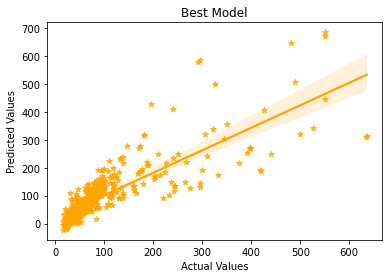

In [22]:
sns.regplot(x=y_test, y=model_y_pred, color='orange', marker='*')
plt.title("Best Model")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Predicted Values

In [23]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': model_y_pred, 'Difference': y_test - model_y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1716,39.00,33.271240,5.728760
2427,75.50,85.878282,-10.378282
1492,25.90,6.718407,19.181593
501,73.46,70.228787,3.231213
895,53.81,64.748475,-10.938475
...,...,...,...
1051,242.00,115.548232,126.451768
2555,345.00,303.851102,41.148898
1725,30.50,-2.048151,32.548151
1129,75.00,46.276802,28.723198


# Classification -> Animal Class Type

## (Comparison of Logistic Regression , Decision Tree  and Random Forest Classifier models)

__`Dataset link:`__  https://www.kaggle.com/datasets/uciml/zoo-animal-classification

### Import necessary libraries and modules

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Import dataset

In [25]:
zoo_df = pd.read_csv("zoo.csv")

In [26]:
zoo_des_df = pd.read_csv("class.csv")

### Properties of the dataset

In [27]:
zoo_des_df

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [28]:
zoo_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [29]:
print("There are", zoo_df.shape[0], "samples and", zoo_df.shape[1], "features with totally", zoo_df.size, "elements in the dataset")

There are 101 samples and 18 features with totally 1818 elements in the dataset


In [30]:
zoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [31]:
zoo_df.class_type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

### Extraction of input and output features from zoo dataset

In [32]:
X_zoo = zoo_df.drop(['animal_name', 'class_type'], axis = 1)
y_zoo = zoo_df['class_type']

### Split data into train and test sets

In [33]:
X_train_zoo, X_test_zoo, y_train_zoo, y_test_zoo = train_test_split( X_zoo, y_zoo, test_size = 0.33, random_state = 0)

print("Shape of zoo training set:")
print("X_train", X_train_zoo.shape)
print("y_train", y_train_zoo.shape)
print("\n")
print("Shape of zoo testing set:")
print("X_test", X_test_zoo.shape)
print("y_test", y_test_zoo.shape)

Shape of zoo training set:
X_train (67, 16)
y_train (67,)


Shape of zoo testing set:
X_test (34, 16)
y_test (34,)


### Model Building and Evaluation

In [34]:
ss_lor = [('ss', StandardScaler()), ('lor', LogisticRegression())]
mm_lor = [('mm', MinMaxScaler()), ('lor', LogisticRegression())]

ss_dtc = [('ss', StandardScaler()), ('dtc', DecisionTreeClassifier())]
mm_dtc = [('mm', MinMaxScaler()), ('dtc', DecisionTreeClassifier())]

ss_rfc = [('ss', StandardScaler()), ('rfc', RandomForestClassifier())]
mm_rfc = [('mm', MinMaxScaler()), ('rfc', RandomForestClassifier())]

classifier_models = { 
    "Logistic Regression": LogisticRegression(),
    "Logistic Regression with StandardScaler": Pipeline(ss_lor),
    "Logistic Regression with MinMaxScaler": Pipeline(mm_lor),  
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Decision Tree Classifier with StandardScaler": Pipeline(ss_dtc),
    "Decision Tree Classifier with MinMaxScaler": Pipeline(mm_dtc),  
    "Random Forest Classifier": RandomForestClassifier(),
    "Random Forest Classifier with StandardScaler": Pipeline(ss_rfc),
    "Random Forest Classifier with MinMaxScaler": Pipeline(mm_rfc)
}

In [49]:
no_classifiers = len(classifier_models.keys())

def build_classifier(X_train, X_test, y_train, y_test, verbose = True):
    
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers, 3)), columns = ['Classifier', 'Accuracy', 'Training time'])
    
    count = 0
    for key, model in classifier_models.items():
        
        t_start = process_time()  
        model.fit(X_train, y_train)
        
        t_stop = process_time() 
        t_elapsed = t_stop - t_start
        
        y_pred = model.predict(X_test)
        
        df_results.loc[count,'Classifier'] = key
        df_results.loc[count,'Accuracy'] = accuracy_score(y_test, y_pred)
        df_results.loc[count,'Training time'] = t_elapsed
        
        count+=1

    return df_results

In [50]:
zoo_df_results = build_classifier(X_train_zoo, X_test_zoo, y_train_zoo, y_test_zoo)
zoo_df_results.sort_values(by='Accuracy', ascending=False)

,Classifier,Accuracy,Training time
3,Decision Tree Classifier,0.970588,0.000000
1,Logistic Regression with StandardScaler,0.882353,0.031250
4,Decision Tree Classifier with StandardScaler,0.882353,0.000000
5,Decision Tree Classifier with MinMaxScaler,0.882353,0.015625
6,Random Forest Classifier,0.882353,0.203125
7,Random Forest Classifier with StandardScaler,0.882353,0.203125
8,Random Forest Classifier with MinMaxScaler,0.882353,0.203125
0,Logistic Regression,0.852941,0.093750
2,Logistic Regression with MinMaxScaler,0.852941,0.015625


### Best Model

__Decision Tree Classifier with highest `Accuracy of 97%` is the best model__

In [54]:
clf = DecisionTreeClassifier()

clf.fit(X_train_zoo, y_train_zoo)

clf_y_pred = clf.predict(X_test_zoo)

print("Classifier Results:\n")

print("Accuracy of the best Classifier =", accuracy_score(y_test_zoo, clf_y_pred))

Classifier Results:

Accuracy of the best Classifier = 0.9705882352941176


In [55]:
print("Report:\n", classification_report(y_test_zoo, clf_y_pred))

Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         6
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         7
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.97        34
   macro avg       0.93      0.96      0.93        34
weighted avg       0.99      0.97      0.97        34



### Visualization using graphviz for zoo data

In [61]:
with open("tree_zoo.dot",'w') as f:
    f= tree.export_graphviz(clf, out_file=f, impurity= False, feature_names = X_zoo.columns.values, filled=True)

In [62]:
!type tree_zoo.dot

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="milk <= 0.5\nsamples = 67\nvalue = [29, 14, 1, 6, 3, 6, 8]", fillcolor="#f8dbc7"] ;
1 [label="feathers <= 0.5\nsamples = 38\nvalue = [0, 14, 1, 6, 3, 6, 8]", fillcolor="#f1fad7"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="fins <= 0.5\nsamples = 24\nvalue = [0, 0, 1, 6, 3, 6, 8]", fillcolor="#fce9f2"] ;
1 -> 2 ;
3 [label="airborne <= 0.5\nsamples = 18\nvalue = [0, 0, 1, 0, 3, 6, 8]", fillcolor="#fbdeeb"] ;
2 -> 3 ;
4 [label="backbone <= 0.5\nsamples = 13\nvalue = [0, 0, 1, 0, 3, 1, 8]", fillcolor="#f29cc2"] ;
3 -> 4 ;
5 [label="predator <= 0.5\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 1, 8]", fillcolor="#e85295"] ;
4 -> 5 ;
6 [label="legs <= 3.0\nsamples = 3\nvalue = [0, 0, 0, 0, 0, 1, 2]", fillcolor="#f29cc2"] ;
5 -> 6 ;
7 [label="samples = 2\nvalue = [0, 0, 0, 0, 0, 0, 2]", fillcolor="#e53986"] ;
6 -> 7 ;
8 [label="samples = 1\nvalue = [0, 0, 0, 0, 0, 1, 0]", fillcolor="#b139e5"] ;
6 

[Text(273.92727272727274, 203.85, 'X[3] <= 0.5\ngini = 0.736\nsamples = 67\nvalue = [29, 14, 1, 6, 3, 6, 8]'),
 Text(243.4909090909091, 176.67000000000002, 'X[1] <= 0.5\ngini = 0.763\nsamples = 38\nvalue = [0, 14, 1, 6, 3, 6, 8]'),
 Text(213.05454545454546, 149.49, 'X[11] <= 0.5\ngini = 0.747\nsamples = 24\nvalue = [0, 0, 1, 6, 3, 6, 8]'),
 Text(182.61818181818182, 122.31, 'X[4] <= 0.5\ngini = 0.66\nsamples = 18\nvalue = [0, 0, 1, 0, 3, 6, 8]'),
 Text(152.1818181818182, 95.13, 'X[8] <= 0.5\ngini = 0.556\nsamples = 13\nvalue = [0, 0, 1, 0, 3, 1, 8]'),
 Text(91.30909090909091, 67.94999999999999, 'X[6] <= 0.5\ngini = 0.198\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 1, 8]'),
 Text(60.872727272727275, 40.77000000000001, 'X[12] <= 3.0\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 0, 0, 0, 1, 2]'),
 Text(30.436363636363637, 13.590000000000003, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 2]'),
 Text(91.30909090909091, 13.590000000000003, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 1, 0]

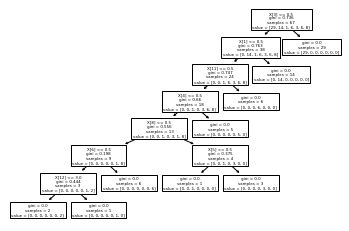

In [63]:
tree.plot_tree(clf)

### End Notes:

In Regression Task for prediction of Chennai House Price,

__Lasso Regression with MinMaxScaler__ with highest `r2 score = 0.673687` and with lowest `RMSE = 56.381385` is the best model.

In Classification Task for classifying the Animals based upon its type, 

__Decision Tree Classifier__ with highest `Accuracy of 97%` is the best model.